In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import sklearn as sk

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
dataset=pd.read_csv("storage_dataset/prototype_final_dataset.csv")
dataset

,Date,Time,SM_2,SM_4,SM_8,SM_20,SM_40,ST_2,ST_4,ST_8,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,01-01-2022,00:00,38.2,35.9,31.0,36.9,34.0,15.9,15.5,15.5,...,1009.4,100.0,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"KHSV,72323003856,72030763804,KMDQ,AAMA1"
1,01-01-2022,01:00,38.2,36.0,30.9,36.7,34.1,16.0,15.6,15.6,...,1009.3,91.7,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"KHSV,72323003856,72030763804,KMDQ,AAMA1"
2,01-01-2022,02:00,38.3,36.0,31.0,36.7,33.9,16.0,15.6,15.6,...,1009.3,62.7,16.0,0.0,0.0,0.0,NaN,Partially cloudy,partly-cloudy-night,"KHSV,72323003856,72030763804,KMDQ,AAMA1"
3,01-01-2022,03:00,38.3,35.8,30.9,36.7,33.9,16.1,15.7,15.6,...,1009.3,91.7,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"KHSV,72323003856,72030763804,KMDQ,AAMA1"
4,01-01-2022,04:00,38.3,35.9,30.9,36.7,33.9,16.2,15.7,15.7,...,1009.6,100.0,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"KHSV,72323003856,72030763804,KMDQ"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,31-12-2022,19:00,36.8,36.5,30.6,34.7,31.8,10.5,10.1,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8756,31-12-2022,20:00,36.7,36.2,30.5,34.7,31.8,10.2,10.0,9.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8757,31-12-2022,21:00,36.5,36.1,30.3,34.9,31.8,9.9,9.9,9.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8758,31-12-2022,22:00,36.5,36.1,30.3,34.8,32.0,9.7,9.7,9.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dataset.columns

Index(['Date', 'Time', 'SM_2', 'SM_4', 'SM_8', 'SM_20', 'SM_40', 'ST_2',
       'ST_4', 'ST_8', 'ST_20', 'ST_40', 'temp', 'feelslike', 'dew',
       'humidity', 'precip', 'precipprob', 'preciptype', 'snow', 'snowdepth',
       'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk',
       'conditions', 'icon', 'stations'],
      dtype='object')

In [5]:
dataset.__len__()

8760

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              8760 non-null   object 
 1   Time              8760 non-null   object 
 2   SM_2              8760 non-null   float64
 3   SM_4              8760 non-null   float64
 4   SM_8              8760 non-null   float64
 5   SM_20             8760 non-null   float64
 6   SM_40             8760 non-null   float64
 7   ST_2              8760 non-null   float64
 8   ST_4              8760 non-null   float64
 9   ST_8              8760 non-null   float64
 10  ST_20             8760 non-null   float64
 11  ST_40             8760 non-null   float64
 12  temp              2879 non-null   float64
 13  feelslike         2879 non-null   float64
 14  dew               2879 non-null   float64
 15  humidity          2879 non-null   float64
 16  precip            2879 non-null   float64


In [7]:
dataset.__len__()

8760

In [8]:
dataset

,Date,Time,SM_2,SM_4,SM_8,SM_20,SM_40,ST_2,ST_4,ST_8,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,01-01-2022,00:00,38.2,35.9,31.0,36.9,34.0,15.9,15.5,15.5,...,1009.4,100.0,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"KHSV,72323003856,72030763804,KMDQ,AAMA1"
1,01-01-2022,01:00,38.2,36.0,30.9,36.7,34.1,16.0,15.6,15.6,...,1009.3,91.7,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"KHSV,72323003856,72030763804,KMDQ,AAMA1"
2,01-01-2022,02:00,38.3,36.0,31.0,36.7,33.9,16.0,15.6,15.6,...,1009.3,62.7,16.0,0.0,0.0,0.0,NaN,Partially cloudy,partly-cloudy-night,"KHSV,72323003856,72030763804,KMDQ,AAMA1"
3,01-01-2022,03:00,38.3,35.8,30.9,36.7,33.9,16.1,15.7,15.6,...,1009.3,91.7,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"KHSV,72323003856,72030763804,KMDQ,AAMA1"
4,01-01-2022,04:00,38.3,35.9,30.9,36.7,33.9,16.2,15.7,15.7,...,1009.6,100.0,16.0,0.0,0.0,0.0,NaN,Overcast,cloudy,"KHSV,72323003856,72030763804,KMDQ"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,31-12-2022,19:00,36.8,36.5,30.6,34.7,31.8,10.5,10.1,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8756,31-12-2022,20:00,36.7,36.2,30.5,34.7,31.8,10.2,10.0,9.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8757,31-12-2022,21:00,36.5,36.1,30.3,34.9,31.8,9.9,9.9,9.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8758,31-12-2022,22:00,36.5,36.1,30.3,34.8,32.0,9.7,9.7,9.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
dataset.drop(
    [
        "Date",
        "SM_2",
        "SM_8",
        "SM_20",
        "SM_40",
        "ST_2",
        "ST_8",
        "ST_20",
        "ST_40",
        "solarenergy",
        "precipprob",
        "preciptype",
        "snow",
        "snowdepth",
        "windgust",
        "winddir",
        "sealevelpressure",
        "visibility",
        "solarenergy",
        "uvindex",
        "severerisk",
        "icon",
        "stations",
        "dew",
        "solarradiation",
        "Time",
        # "cloudcover",
        "feelslike",
        # "windspeed",
    ],
    inplace=True,
    axis=1,
)

In [10]:
dataset

,SM_4,ST_2,ST_4,temp,humidity,precip,windspeed,cloudcover,conditions
0,35.9,15.9,15.5,21.6,84.50,0.0,22.3,100.0,Overcast
1,36.0,16.0,15.6,21.6,84.97,0.0,27.7,91.7,Overcast
2,36.0,16.0,15.6,21.2,86.87,0.0,22.8,62.7,Partially cloudy
3,35.8,16.1,15.7,21.2,86.66,0.0,22.8,91.7,Overcast
4,35.9,16.2,15.7,21.6,84.50,0.0,19.8,100.0,Overcast
...,...,...,...,...,...,...,...,...,...
8755,36.5,10.5,10.1,NaN,NaN,NaN,NaN,NaN,NaN
8756,36.2,10.2,10.0,NaN,NaN,NaN,NaN,NaN,NaN
8757,36.1,9.9,9.9,NaN,NaN,NaN,NaN,NaN,NaN
8758,36.1,9.7,9.7,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SM_4        8760 non-null   float64
 1   ST_2        8760 non-null   float64
 2   ST_4        8760 non-null   float64
 3   temp        2879 non-null   float64
 4   humidity    2879 non-null   float64
 5   precip      2879 non-null   float64
 6   windspeed   2879 non-null   float64
 7   cloudcover  2879 non-null   float64
 8   conditions  2879 non-null   object 
dtypes: float64(8), object(1)
memory usage: 616.1+ KB


In [12]:
dataset=dataset.dropna()

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2879 entries, 0 to 2879
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SM_4        2879 non-null   float64
 1   ST_2        2879 non-null   float64
 2   ST_4        2879 non-null   float64
 3   temp        2879 non-null   float64
 4   humidity    2879 non-null   float64
 5   precip      2879 non-null   float64
 6   windspeed   2879 non-null   float64
 7   cloudcover  2879 non-null   float64
 8   conditions  2879 non-null   object 
dtypes: float64(8), object(1)
memory usage: 224.9+ KB


In [14]:
dataset

,SM_4,ST_2,ST_4,temp,humidity,precip,windspeed,cloudcover,conditions
0,35.9,15.9,15.5,21.6,84.50,0.0,22.3,100.0,Overcast
1,36.0,16.0,15.6,21.6,84.97,0.0,27.7,91.7,Overcast
2,36.0,16.0,15.6,21.2,86.87,0.0,22.8,62.7,Partially cloudy
3,35.8,16.1,15.7,21.2,86.66,0.0,22.8,91.7,Overcast
4,35.9,16.2,15.7,21.6,84.50,0.0,19.8,100.0,Overcast
...,...,...,...,...,...,...,...,...,...
2875,23.4,19.4,18.9,24.7,64.43,0.0,10.6,87.7,Partially cloudy
2876,23.5,19.1,18.8,22.6,73.48,0.0,3.4,35.5,Partially cloudy
2877,23.4,18.9,18.7,22.0,77.15,0.0,18.6,49.4,Partially cloudy
2878,23.4,18.7,18.6,20.3,82.27,0.0,16.5,24.8,Partially cloudy


In [15]:
X_train=dataset.iloc[:,1:].values
X_train

array([[15.9, 15.5, 21.6, ..., 22.3, 100.0, 'Overcast'],
       [16.0, 15.6, 21.6, ..., 27.7, 91.7, 'Overcast'],
       [16.0, 15.6, 21.2, ..., 22.8, 62.7, 'Partially cloudy'],
       ...,
       [18.9, 18.7, 22.0, ..., 18.6, 49.4, 'Partially cloudy'],
       [18.7, 18.6, 20.3, ..., 16.5, 24.8, 'Partially cloudy'],
       [18.6, 18.5, 19.7, ..., 15.3, 7.8, 'Clear']], dtype=object)

In [16]:
y_train=dataset.iloc[:,0].values
y_train

array([35.9, 36. , 36. , ..., 23.4, 23.4, 23.4])

In [17]:
""" taking care of categorical data in conditions column """
from sklearn.compose import  ColumnTransformer
from sklearn.preprocessing import  OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X_train = np.array(ct.fit_transform(X_train))
X_train

array([[0.0, 1.0, 0.0, ..., 0.0, 22.3, 100.0],
       [0.0, 1.0, 0.0, ..., 0.0, 27.7, 91.7],
       [0.0, 0.0, 1.0, ..., 0.0, 22.8, 62.7],
       ...,
       [0.0, 0.0, 1.0, ..., 0.0, 18.6, 49.4],
       [0.0, 0.0, 1.0, ..., 0.0, 16.5, 24.8],
       [1.0, 0.0, 0.0, ..., 0.0, 15.3, 7.8]], dtype=object)

In [18]:
X_train.shape

(2879, 15)

In [19]:
y_train.shape

(2879,)

In [20]:
X_train[0]

array([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.9, 15.5, 21.6, 84.5,
       0.0, 22.3, 100.0], dtype=object)

In [21]:
""" Standard Scaling data """
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X_train[:,8:]=sc.fit_transform(X_train[:,8:])
X_train[0]

array([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7382198952879583,
       0.7654320987654322, 0.8179347826086958, 0.8197464821490872, 0.0,
       0.4684873949579832, 1.0], dtype=object)

In [22]:
X_train[1]

array([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7434554973821991,
       0.771604938271605, 0.8179347826086958, 0.8252122339806954, 0.0,
       0.5819327731092436, 0.917], dtype=object)

In [23]:
X_train[1]

array([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7434554973821991,
       0.771604938271605, 0.8179347826086958, 0.8252122339806954, 0.0,
       0.5819327731092436, 0.917], dtype=object)

In [24]:
X_train[0].shape

(15,)

In [25]:
""" Model """
model=keras.Sequential(
    [
        keras.layers.Dense(15,activation=keras.activations.relu),
        keras.layers.Dense(12,activation=keras.activations.relu),
        keras.layers.Dense(8,activation=keras.activations.relu),
        keras.layers.Dense(4,activation=keras.activations.relu),
        keras.layers.Dense(2,activation=keras.activations.relu),
        keras.layers.Dense(1)
    ]
)

In [26]:
model.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.mean_squared_error,metrics=keras.metrics.mean_absolute_error)

In [27]:
X_train=np.asarray(X_train).astype("float32")
y_train=np.asarray(y_train).astype("float32")

In [28]:
X_train[0]

array([0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.7382199 , 0.7654321 ,
       0.8179348 , 0.8197465 , 0.        , 0.46848738, 1.        ],
      dtype=float32)

In [29]:
history=model.fit(X_train,y_train,epochs=10)
model.summary()

Epoch 1/10
90/90 [==============================] - 1s 950us/step - loss: 1168.7410 - mean_absolute_error: 34.0061
Epoch 2/10
90/90 [==============================] - 0s 871us/step - loss: 453.2636 - mean_absolute_error: 18.4040
Epoch 3/10
90/90 [==============================] - 0s 899us/step - loss: 47.4278 - mean_absolute_error: 5.5441
Epoch 4/10
90/90 [==============================] - 0s 905us/step - loss: 31.6761 - mean_absolute_error: 4.3465
Epoch 5/10
90/90 [==============================] - 0s 892us/step - loss: 19.5495 - mean_absolute_error: 3.2461
Epoch 6/10
90/90 [==============================] - 0s 882us/step - loss: 13.7641 - mean_absolute_error: 2.7382
Epoch 7/10
90/90 [==============================] - 0s 905us/step - loss: 11.4230 - mean_absolute_error: 2.5459
Epoch 8/10
90/90 [==============================] - 0s 894us/step - loss: 10.4562 - mean_absolute_error: 2.4810
Epoch 9/10
90/90 [==============================] - 0s 1ms/step - loss: 9.9296 - mean_absolute_erro

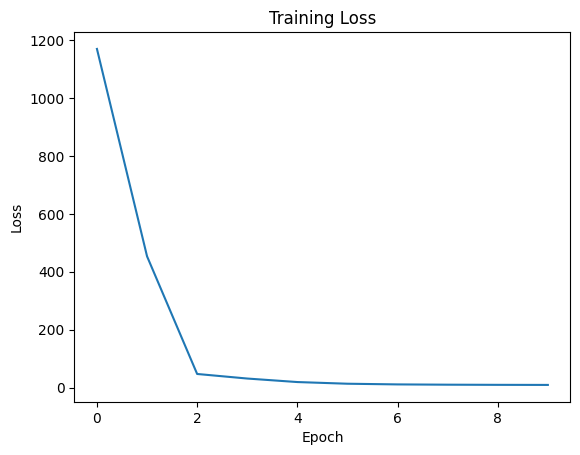

In [30]:
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [31]:
y_pred=model.predict(X_train).reshape(-1,1)
y_pred

90/90 [==============================] - 0s 680us/step


array([[37.474754],
       [37.64462 ],
       [34.85819 ],
       ...,
       [32.064117],
       [31.543425],
       [33.407   ]], dtype=float32)

In [32]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_train,y_pred)

2.4517415

In [33]:
X_train.shape

(2879, 15)

In [34]:
model.input_shape

(None, 15)

In [35]:
to_predit=X_train[0].reshape(-1,X_train.shape[1])

In [36]:
model.predict(to_predit)

1/1 [==============================] - 0s 16ms/step


array([[37.474754]], dtype=float32)

In [37]:
y_train[0]

35.9

In [38]:
for idx in range(100):
    to_predit=X_train[idx].reshape(-1,X_train.shape[1])
    print(y_train[idx]," --> ", model.predict(to_predit))

1/1 [==============================] - 0s 16ms/step
35.9  -->  [[37.474754]]
1/1 [==============================] - 0s 13ms/step
36.0  -->  [[37.64462]]
1/1 [==============================] - 0s 14ms/step
36.0  -->  [[34.85819]]
1/1 [==============================] - 0s 14ms/step
35.8  -->  [[37.201202]]
1/1 [==============================] - 0s 13ms/step
35.9  -->  [[37.167824]]
1/1 [==============================] - 0s 14ms/step
35.9  -->  [[36.267067]]
1/1 [==============================] - 0s 13ms/step
35.9  -->  [[32.871216]]
1/1 [==============================] - 0s 16ms/step
36.0  -->  [[34.310993]]
1/1 [==============================] - 0s 15ms/step
35.8  -->  [[36.72922]]
1/1 [==============================] - 0s 15ms/step
35.8  -->  [[37.429527]]
1/1 [==============================] - 0s 16ms/step
35.7  -->  [[37.52668]]
1/1 [==============================] - 0s 15ms/step
35.5  -->  [[37.92322]]
1/1 [==============================] - 0s 16ms/step
35.4  -->  [[37.243122]]
1/1 

In [39]:
prototype=model.save(filepath="zeus.h5")

c:\Users\ganes\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
